In [28]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
data_dir = 'C://Users//msanj//AI_ML_Project//dataset2-master//dataset2-master//images//TRAIN'

class_labels = ['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

In [30]:
filepaths = []
labels = []

for label in class_labels:
    class_dir = os.path.join(data_dir, label)
    for file in os.listdir(class_dir):
        if file.endswith('.jpeg') or file.endswith('.png'):
            filepaths.append(os.path.join(class_dir, file))
            labels.append(label)

In [31]:
bloodCell_df = pd.DataFrame(
    {
        'filepaths' : filepaths,
        'labels' : labels
    }
)

In [32]:
bloodCell_df = bloodCell_df.sample(frac=1).reset_index(drop=True)

In [33]:
bloodCell_df.head()

,filepaths,labels
0,C://Users//msanj//AI_ML_Project//dataset2-mast...,NEUTROPHIL
1,C://Users//msanj//AI_ML_Project//dataset2-mast...,LYMPHOCYTE
2,C://Users//msanj//AI_ML_Project//dataset2-mast...,LYMPHOCYTE
3,C://Users//msanj//AI_ML_Project//dataset2-mast...,EOSINOPHIL
4,C://Users//msanj//AI_ML_Project//dataset2-mast...,LYMPHOCYTE


In [34]:
train_images, test_images = train_test_split(bloodCell_df, test_size = 0.3, random_state=42)
train_set, val_set = train_test_split(bloodCell_df, test_size = 0.2, random_state = 42)

In [35]:
image_gen = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input)
train = image_gen.flow_from_dataframe(dataframe = train_set, x_col = 'filepaths', y_col='labels', target_size = (244, 244), color_mode = 'rgb', class_mode = 'categorical', batch_size = 8, shuffle = False)
test = image_gen.flow_from_dataframe(dataframe = test_images, x_col = 'filepaths', y_col='labels', target_size = (244, 244), color_mode = 'rgb', class_mode = 'categorical', batch_size = 8, shuffle = False)
val = image_gen.flow_from_dataframe(dataframe = val_set, x_col = 'filepaths', y_col='labels', target_size = (244, 244), color_mode = 'rgb', class_mode = 'categorical', batch_size = 8, shuffle = False)

Found 7965 validated image filenames belonging to 4 classes.
Found 2988 validated image filenames belonging to 4 classes.
Found 1992 validated image filenames belonging to 4 classes.


In [40]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters = 128, kernel_size = (8, 8), strides = (3, 3), activation = 'relu', input_shape=(224, 224, 3)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters = 256, kernel_size = (5, 5), strides = (1, 1), activation = 'relu', padding = 'same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size = (3, 3)),

    keras.layers.Conv2D(filters = 256, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding = 'same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters = 256, kernel_size = (1, 1), strides = (1, 1), activation = 'relu', padding = 'same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters = 256, kernel_size = (1, 1), strides = (1, 1), activation = 'relu', padding = 'same'),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters = 512, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size= (2, 2)),

    keras.layers.Conv2D(filters = 512, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters = 512, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.BatchNormalization(),

    keras.layers.MaxPool2D(pool_size= (2, 2)),

    keras.layers.Conv2D(filters = 512, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.BatchNormalization(),

    keras.layers.MaxPool2D(pool_size= (2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4, activation = 'softmax')
])

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.optimizers.SGD(learning_rate = 0.001),
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 73, 73, 128)         │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 73, 73, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 73, 73, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 73, 73, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 24, 24, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 24, 24, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 24, 24, 256)         │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 24, 24, 256)         │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 24, 24, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 24, 24, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 12, 12, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 12, 12, 512)         │           2,0

 Total params: 15,611,524 (59.55 MB)

 Trainable params: 15,605,124 (59.53 MB)

 Non-trainable params: 6,400 (25.00 KB)

In [41]:
history = model.fit(train, epochs = 5, validation_data = val, verbose = 1)

Epoch 1/5
996/996 ━━━━━━━━━━━━━━━━━━━━ 1813s 2s/step - accuracy: 0.3687 - loss: 1.6375 - val_accuracy: 0.5698 - val_loss: 1.0096
Epoch 2/5
996/996 ━━━━━━━━━━━━━━━━━━━━ 1726s 2s/step - accuracy: 0.5435 - loss: 1.0374 - val_accuracy: 0.7254 - val_loss: 0.7133
Epoch 3/5
996/996 ━━━━━━━━━━━━━━━━━━━━ 1724s 2s/step - accuracy: 0.6923 - loss: 0.7259 - val_accuracy: 0.7575 - val_loss: 0.5432
Epoch 4/5
996/996 ━━━━━━━━━━━━━━━━━━━━ 1947s 2s/step - accuracy: 0.8056 - loss: 0.4755 - val_accuracy: 0.8976 - val_loss: 0.2581
Epoch 5/5
996/996 ━━━━━━━━━━━━━━━━━━━━ 1857s 2s/step - accuracy: 0.8717 - loss: 0.3287 - val_accuracy: 0.9142 - val_loss: 0.2187


In [43]:
history1 = model.fit(train, epochs = 1, validation_data = val, verbose = 1)

996/996 ━━━━━━━━━━━━━━━━━━━━ 1852s 2s/step - accuracy: 0.9048 - loss: 0.2403 - val_accuracy: 0.9538 - val_loss: 0.1349


In [47]:
import numpy as np

pred = model.predict(test)
pred = np.argmax(pred, axis = 1)

labels = (train.class_indices)
labels = dict((v, k) for k, v in labels.items())
pred2 = [labels[k] for k in pred]

374/374 ━━━━━━━━━━━━━━━━━━━━ 164s 439ms/step


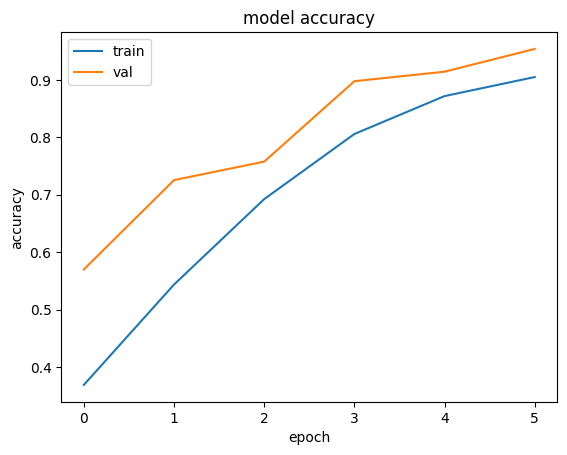

In [48]:
plt.plot(history.history['accuracy'] + history1.history['accuracy'])
plt.plot(history.history['val_accuracy'] + history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

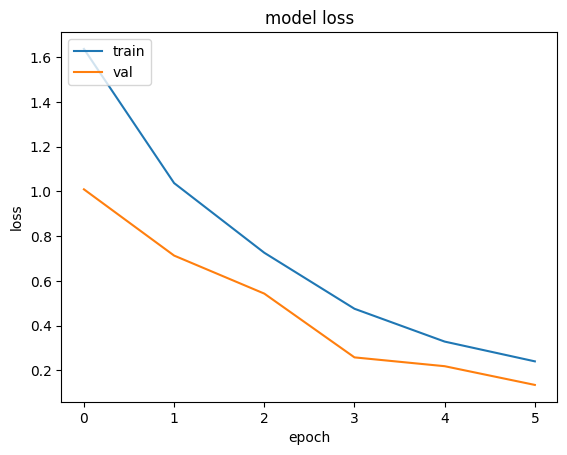

In [49]:
plt.plot(history.history['loss'] + history1.history['loss'])
plt.plot(history.history['val_loss'] + history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

y_test = test_images.labels
print(classification_report(y_test, pred2))
print("Accuracy of the Model:", '{:.1f}%'.format(accuracy_score(y_test, pred2)*100))

              precision    recall  f1-score   support

  EOSINOPHIL       0.93      0.93      0.93       774
  LYMPHOCYTE       1.00      0.98      0.99       739
    MONOCYTE       1.00      0.99      1.00       741
  NEUTROPHIL       0.92      0.93      0.93       734

    accuracy                           0.96      2988
   macro avg       0.96      0.96      0.96      2988
weighted avg       0.96      0.96      0.96      2988

Accuracy of the Model: 96.1%


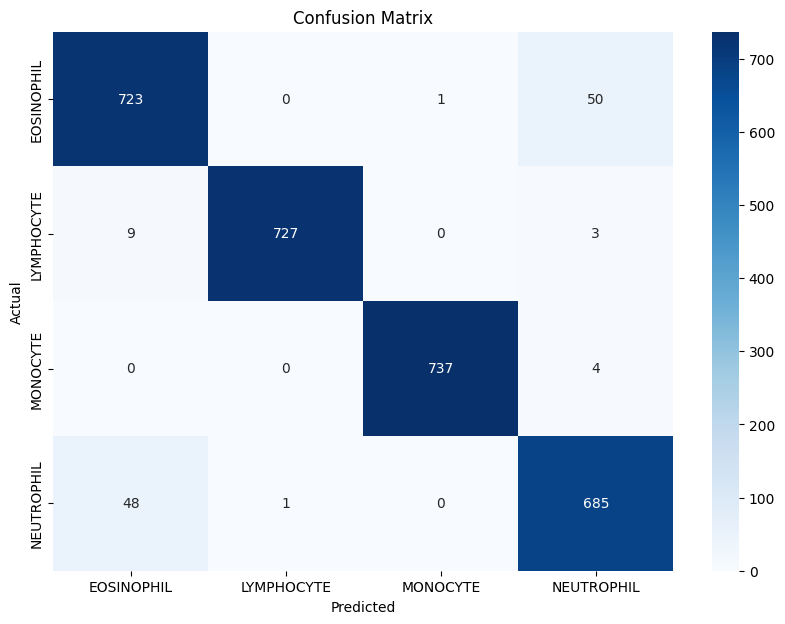

In [51]:
cm = confusion_matrix(y_test, pred2)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot = True, fmt = 'g', vmin = 0, cmap = 'Blues')

plt.xticks(ticks= [0.5, 1.5, 2.5, 3.5], labels = class_labels)
plt.yticks(ticks= [0.5, 1.5, 2.5, 3.5], labels = class_labels)
plt.xlabel("Predicted")
plt.ylabel('Actual')

plt.title("Confusion Matrix")

plt.show()

In [ ]:
# At Final save the model as it is shown below

model.save("Blood Cell.keras")